## Step 1. Open and look at the file

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/datasets/games.csv')

print(data.head())
print(data.info())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

Conclusion:

- The file was readable by just doing read_csv. I looked at it with head and info.  
- The data makes sense, but there are missing values and odd column names.

## Step 2. Prepare the data

In [ ]:
data.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales',
                'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 
                'user_score', 'rating']

#Will change "tbd" to NaN since it's the only non-numeric string
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

data['name'] = data['name'].fillna('Unknown')
data['genre'] = data['genre'].fillna('Unknown')

data['total_sales'] = data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales']

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
total_sales        16715 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB
None


Approach:

- First, I made all the column names lowercase  
- Then did data type conversion and missing values  
- Then added the total_sales column  

Data type conversion: 

- I changed user_score from a string to a float, which will let me perform operations on it  
- Can't change year_of_release to an int because there are missing values, but it should work fine even if it's a float

Missing values: 

- No way of knowing when a game was released if year of release was missing, so I left those blank  
- Replaced the missing values in Name and Genre with "Unknown"
- I left the missing values in the score and rating columns missing, because there's no good way to approximate what they would be, especially when such a large number of values are missing.
- For "tbd" in the user_score column, I replaced it with NaN. This is because if we don't know the user score yet, there's no usable data there.   

## Step 3. Analyze the data

### Games released per year

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64


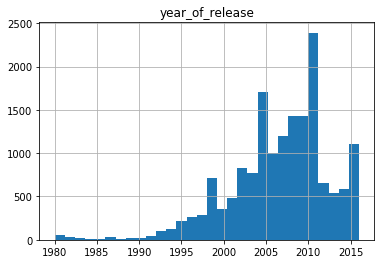

In [ ]:
print(data['year_of_release'].value_counts()) 
data.hist('year_of_release', bins=30)
plt.show()

Conclusion: The number of games released increased steadily until around 2010, and slightly fewer games have been released since then. Data before the 1990s is likely not very significant because there are so few games being released.

### How sales vary between platforms

          total_sales
platform             
PS2           1255.77
X360           971.42
PS3            939.65
Wii            907.51
DS             806.12




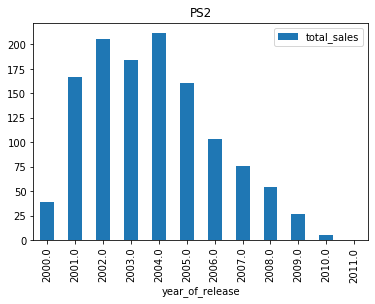

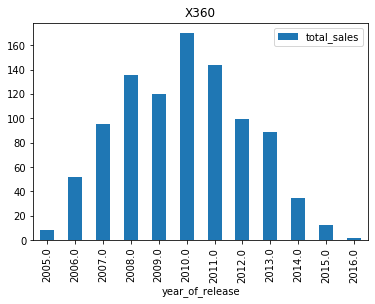

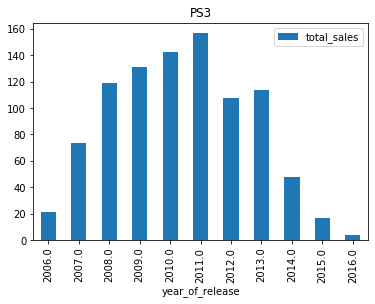

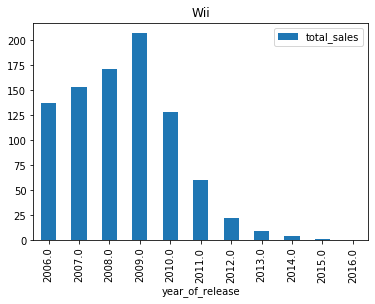

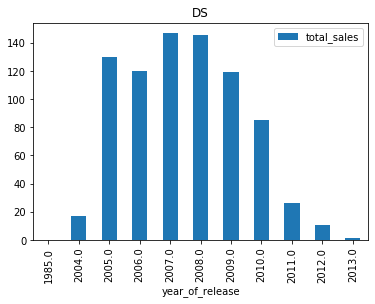

In [ ]:
sales_by_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
top_5 = sales_by_platform.sort_values('total_sales', ascending=False).head(5)
print(top_5)

print()
print()

for index, row in top_5.iterrows():
    platform = index
    sales_by_year = data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    sales_by_year.plot.bar()
    plt.title(platform)
    plt.show()

I found that the 5 platforms with the highest sales were PS2, X360, PS3, Wii, and DS. Then I plotted histograms for all of those to see how their sales changed throughout the years.

- PS2 started in 2000 and was popular for a while, but now has zero sales.  
- X360 started in the early 2000s, grew, and has been shrinking but is still (barely) in use.  
- PS3's graph is similar to X360s, with the most sales in 2011.  
- Wii had a lot of sales until around 2010 but now has zero sales.  
- DS had its curve between 2004 and 2013 but now has no sales.

The life of most platforms seems to be around 10 years.

### Choosing one period to take data for

In [ ]:
recent_data = data.query('year_of_release > 2010')
print(recent_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4022 entries, 16 to 16714
Data columns (total 12 columns):
name               4022 non-null object
platform           4022 non-null object
year_of_release    4022 non-null float64
genre              4022 non-null object
na_sales           4022 non-null float64
eu_sales           4022 non-null float64
jp_sales           4022 non-null float64
other_sales        4022 non-null float64
critic_score       1812 non-null float64
user_score         2032 non-null float64
rating             2314 non-null object
total_sales        4022 non-null float64
dtypes: float64(8), object(4)
memory usage: 408.5+ KB
None


Taking data from 10 or more years into the past will not give accurate projections for 2017, because entire platforms can grow and die in that time. However, we need a significant amount of data to be included in the slice. So I took data from the last 5 years, so anything after 2010, which gives around 4000 entries, which is 1/4 of the original entries.

### Selecting profitable platforms

PS3     708
3DS     512
X360    498
PSV     429
PS4     392
PC      389
PSP     312
XOne    247
Wii     197
DS      184
WiiU    147
PS2       7
Name: platform, dtype: int64
          total_sales
platform             
PS3            445.57
X360           380.38
PS4            314.14
3DS            257.81
XOne           159.32


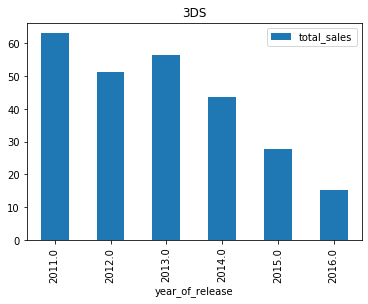

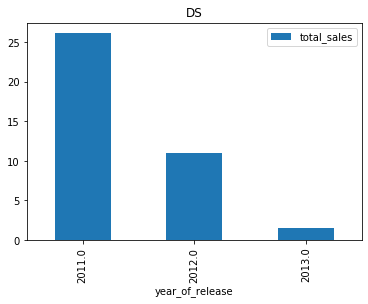

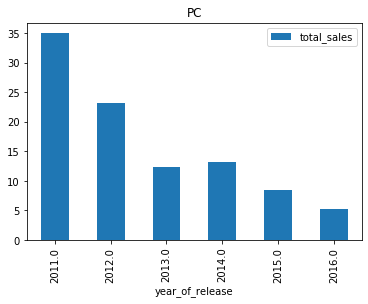

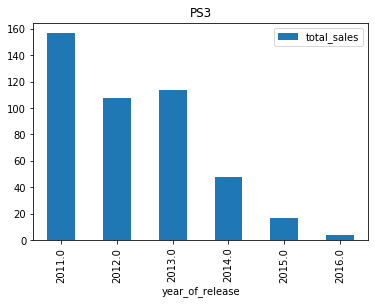

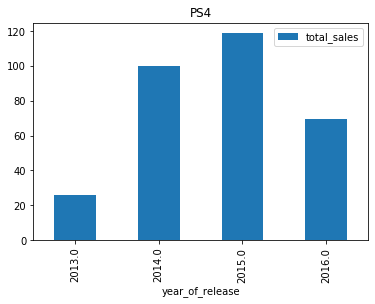

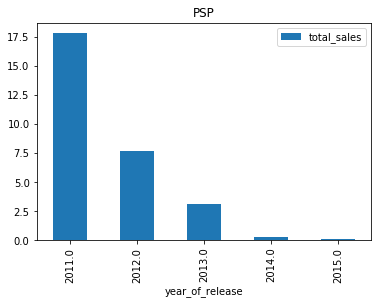

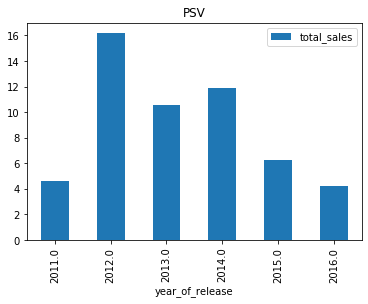

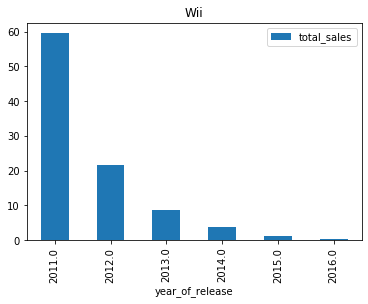

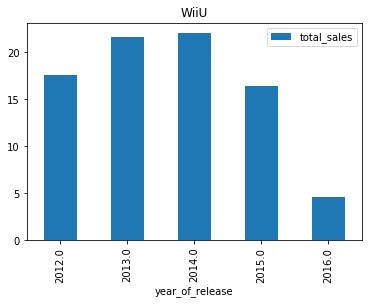

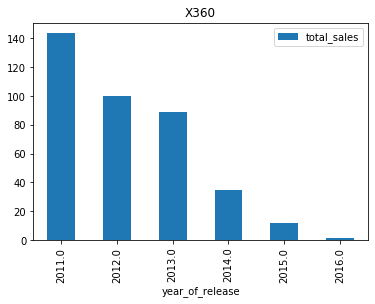

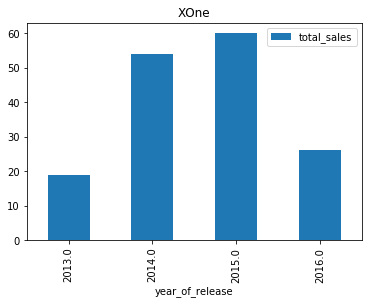

In [ ]:
print(recent_data['platform'].value_counts())

recent_data = recent_data.query('platform != "PS2"')

by_platform = recent_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
print(by_platform.sort_values('total_sales', ascending=False).head(5))

for index, row in by_platform.iterrows():
    platform = index
    sales_by_year = recent_data[recent_data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    sales_by_year.plot.bar()
    plt.title(platform)
    plt.show()


- Excluded PS2, as it had only 7 games while all the others had over 100  
- Sorted the platforms by total sales and found that the highest sales were PS3, X360, PS4, 3DS, and XOne  
- Created bar graphs to show sales by year for all the platforms  

Conclusion: 3DS and PC and PS3 and Wii and X360 are shrinking, so they're not profitable. DS and PSP are no longer in use. Keeping in mind that data from 2016 may be incomplete, it looks like PS4 and XOne may be growing, and PSV and WiiU will likely continue to be profitable for a while. PS4 and XOne are also both on the top 5 sales list, so those are two potentially profitable ones.

### Sales broken down by platform

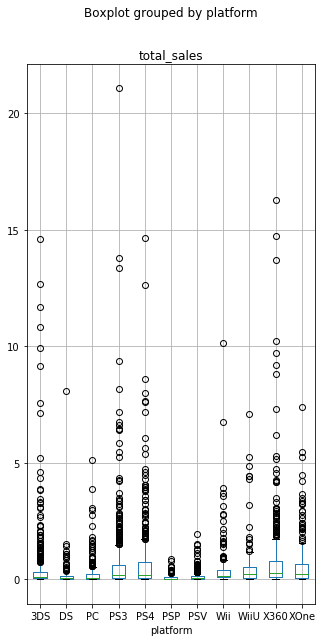

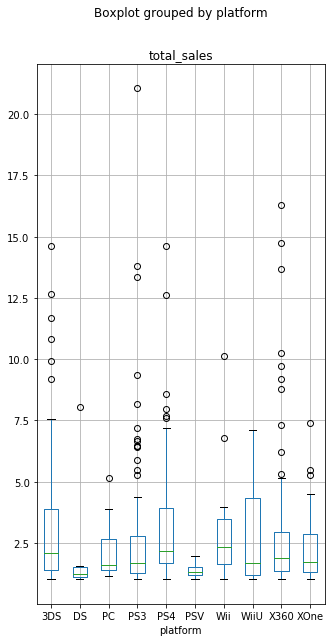

In [ ]:
recent_data.boxplot(column='total_sales', by='platform', figsize=(5, 10))
plt.show()

recent_data.query('total_sales > 1').boxplot(column='total_sales', by='platform', figsize=(5, 10))
plt.show()


- The boxplot of global sales grouped by platform indicates that most of the sales are very low, and higher sales are outliers. To make a more readable boxplot, I got rid of games that sold less than 1 million dollars, and then considered both boxplots.  

Conclusion: The mean sales are not that different between platforms, and they are all below $2.5 million. This is probably because there are so many games that don't sell a lot. The difference is in the distribution--platforms that sell more have more games above the mean and/or outliers.

### Correlation between reviews and sales

Correlation between critic reviews and sales:
0.40656790206178095


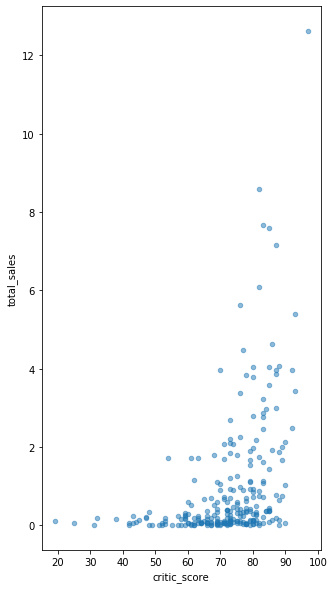

Correlation between user reviews and sales:
-0.03195711020455645


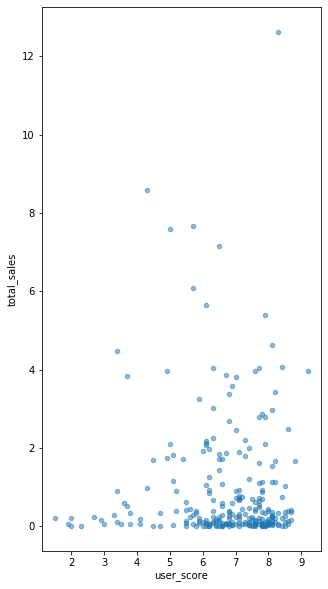

In [ ]:
ps4_data = recent_data.query('platform == "PS4"')

print('Correlation between critic reviews and sales:')
print(ps4_data['critic_score'].corr(ps4_data['total_sales']))
ps4_data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(5,10))
plt.show()

print('Correlation between user reviews and sales:')
print(ps4_data['user_score'].corr(ps4_data['total_sales']))
ps4_data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, figsize=(5,10))
plt.show()

Chosen platform: PS4 

Conclusion: The correlation between critic reviews and sales was significant. Most of the highest selling games also had very high reviews, although plenty of low selling games also did. 

The correlation between user reviews and sales is very small, and there are plenty of high selling games with low reviews, and vice versa.

### Compare those games across different platforms

LEGO Marvel Super Heroes    9
FIFA 14                     9
FIFA 15                     8
Terraria                    8
The LEGO Movie Videogame    8
Name: name, dtype: int64


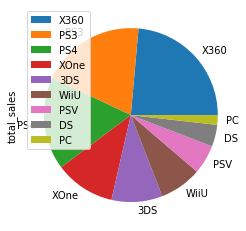

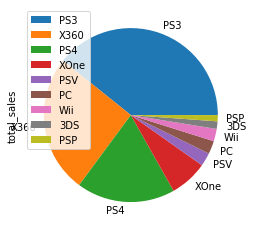

In [ ]:
print(recent_data['name'].value_counts().head())

lego_data = recent_data.query('name == "LEGO Marvel Super Heroes"')
lego_data.set_index('platform', inplace=True)
lego_data.plot.pie(y='total_sales')

fifa_data = recent_data.query('name == "FIFA 14"')
fifa_data.set_index('platform', inplace=True)
fifa_data.plot.pie(y='total_sales')

Task: "compare the same games across different platforms"

I interpreted this to mean find some games that are on multiple platforms and analyze them. I chose LEGO Marvel Superheroes and FIFA 14 because they are both on the most platforms including PS4. I made pie charts of the sales on different platforms.

Conclusion: For these two different games, the distributions of sales are pretty similar for all the different platforms. This shows that the platform has more to do with how much the game sells than the game itself.

### Games by genre

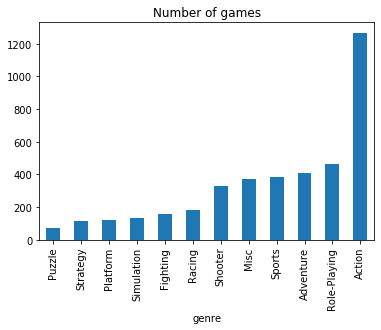

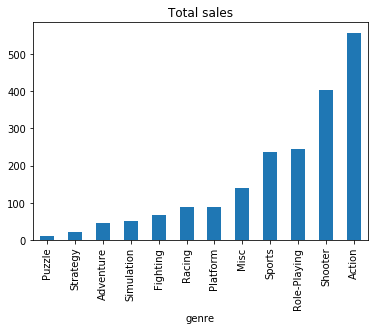

In [ ]:
recent_data.groupby('genre')['name'].count().sort_values().plot.bar(title="Number of games")
plt.show()

recent_data.groupby('genre')['total_sales'].sum().sort_values().plot.bar(title="Total sales")
plt.show()

Conclusion: The most profitable games are Sports, Role-playing, Shooter, and Action. The most common type is Action by far. Adventure games are not as profitable as they would seem for the number of games produced, while Shooter games are much more profitable. Other than that, distribution of games seems correlated with distribution of sales.

## Step 4. Create user profile for each region

-------NA-------
Top five platforms:
          na_sales
platform          
X360        226.80
PS3         168.26
PS4         108.74
XOne         93.12
3DS          82.65
Top five genres:
              na_sales
genre                 
Action          230.92
Shooter         194.43
Sports          108.62
Role-Playing     83.78
Misc             69.69
Correlation between ESRB ratings and sales:


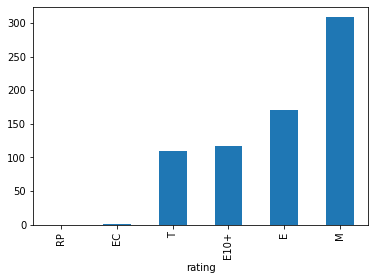

-------EU-------
Top five platforms:
          eu_sales
platform          
PS3         163.10
PS4         141.09
X360        117.10
3DS          61.27
PC           56.70
Top five genres:
              eu_sales
genre                 
Action          199.12
Shooter         148.02
Sports           88.39
Role-Playing     62.30
Racing           40.58
Correlation between ESRB ratings and sales:


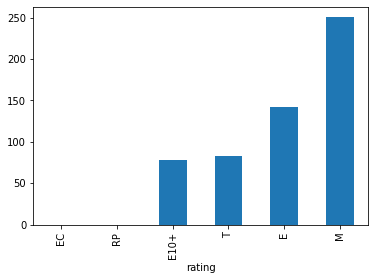

-------JP-------
Top five platforms:
          jp_sales
platform          
3DS         100.62
PS3          49.39
PSP          24.04
PSV          21.84
PS4          15.96
Top five genres:
              jp_sales
genre                 
Role-Playing     79.87
Action           63.56
Misc             17.60
Fighting         12.38
Platform         12.13
Correlation between ESRB ratings and sales:


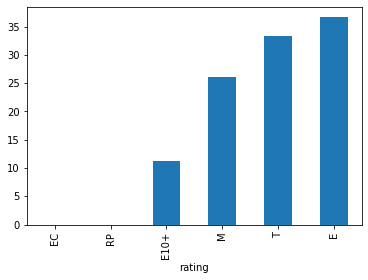

In [ ]:
print("-------NA-------")
print("Top five platforms:")
print(recent_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head(5))
print("Top five genres:")
print(recent_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head(5))
print("Correlation between ESRB ratings and sales:")
recent_data.groupby('rating')['na_sales'].sum().sort_values().plot.bar()
plt.show()

print("-------EU-------")
print("Top five platforms:")
print(recent_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head(5))
print("Top five genres:")
print(recent_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head(5))
print("Correlation between ESRB ratings and sales:")
recent_data.groupby('rating')['eu_sales'].sum().sort_values().plot.bar()
plt.show()

print("-------JP-------")
print("Top five platforms:")
print(recent_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head(5))
print("Top five genres:")
print(recent_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head(5))
print("Correlation between ESRB ratings and sales:")
recent_data.groupby('rating')['jp_sales'].sum().sort_values().plot.bar()
plt.show()

Conclusions: 

- PS3 and PS4, and 3DS are in the top 5 in all three regions. In NA, there's also X360 and XOne; in EU, there's X360, and PC; and in JP, there's PSP and PSV.  
- In NA and EU, the top genres are Action, Shooter, Sports, and Role-playing, in that order. In NA, the fifth top one is Misc., and in EU it's Racing. In JP, the top genres are different, with the top one being Role-playing, then Action, Misc., Fighting, and Platform.  
- In NA and EU, games rated M and E sold the most, then E10+ and T. Meanwhile in JP, games rated E and T sold the most, then M and E10+.

## Step 5. Test hypotheses

### Average user ratings of Xbox 1 and PC platforms are the same

In [ ]:
from scipy import stats as st

xbox1 = recent_data.query('platform == "XOne"')
pc = recent_data.query('platform == "PC"')

results = st.ttest_ind(xbox1['user_score'], pc['user_score'], nan_policy='omit')

alpha = 0.05

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')

We do not reject the null hypothesis


Null hypothesis: Average user ratings of Xbox 1 and PC platforms are the same

Alternative hypothesis: Average user ratings of Xbox 1 and PC platforms are significantly different

Conclusion: The T test indicates that we cannot find a significant difference between the two platforms. Our original hypothesis was true.

### Average user ratings of Action and Sports genres are different

In [ ]:
action = recent_data.query('genre == "Action"')
sports = recent_data.query('genre == "Sports"')

results = st.ttest_ind(action['user_score'], sports['user_score'], nan_policy='omit')

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')
    
if action['user_score'].mean() < sports['user_score'].mean():
    print('Sports is higher rated')
else:
    print('Action is higher rated')

We reject the null hypothesis
Action is higher rated


Null hypothesis: Average user ratings of Action and Sports genres are the same

Alternative hypothesis: Average user ratings of Action and Sports genres are significantly different.

Conclusion: The T test did reject the null hypothesis, so the original hypothesis was true--there is some difference between the Action and Sports genres. I then tested which one has higher ratings, which was Action.

## Step 6. Conclusion

This project went through a lot of analysis on the data. Here are my main conclusions:

- Different platforms usually take about 10 years to grow and die out. This means that the platforms currently being used are completely different from the ones being used 15 years ago.  
- PS4 and XOne are potentially very profitable in 2017.  
- Most games make less than 2.5 million dollars, and ones making more are usually outliers.   
- Critic reviews are more correlated with sales than user reviews are.  
- Platforms with high sales will have high sales for any game, likewise for platforms with low sales.  
- Action is the most popular genre.  
- In NA and EU, people like action and shooting games and ones rated M best, while in JP, they like role playing games and games rated E.